In [1]:
import pandas as pd

# lakeFS credentials from your docker-compose.yml
ACCESS_KEY = "access_key"
SECRET_KEY = "secret_key"

# lakeFS endpoint (running locally)
lakefs_endpoint = "http://lakefs-dev:8000/"

# lakeFS repository, branch, and file path
repo = "weather"
branch = "main"
path = "weather.parquet"

# Construct the full lakeFS S3-compatible path
lakefs_s3_path = f"s3a://{repo}/{branch}/{path}"

# Configure storage_options for lakeFS (S3-compatible)
storage_options = {
    "key": ACCESS_KEY,
    "secret": SECRET_KEY,
    "client_kwargs": {
        "endpoint_url": lakefs_endpoint
    }
}
path_all_partition = 's3a://weather/main/weather.parquet'

df2=pd.read_parquet(    
    path=path_all_partition,
    storage_options=storage_options
)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype                       
---  ------               --------------  -----                       
 0   timestamp            28 non-null     datetime64[ns]              
 1   minute               28 non-null     int64                       
 2   created_at           28 non-null     datetime64[ns, Asia/Bangkok]
 3   requested_province   28 non-null     object                      
 4   location             28 non-null     object                      
 5   weather_main         28 non-null     object                      
 6   weather_description  28 non-null     object                      
 7   main.temp            28 non-null     float64                     
 8   year                 28 non-null     category                    
 9   month                28 non-null     category                    
 10  day                  28 non-null     cat

,timestamp,minute,created_at,requested_province,location,weather_main,weather_description,main.temp,year,month,day,hour
0,2025-04-10 08:44:01.068884,44,2025-04-10 09:02:01.068798+07:00,Pathum Thani,Pathum Thani,Rain,light rain,34.99,2025,4,10,8
1,2025-04-10 08:44:01.308434,44,2025-04-10 09:02:01.308405+07:00,Bangkok,Pathum Wan,Clouds,overcast clouds,34.88,2025,4,10,8
2,2025-04-10 08:44:01.549741,44,2025-04-10 09:02:01.549728+07:00,Chiang Mai,Chiang Mai,Clouds,few clouds,37.16,2025,4,10,8
3,2025-04-10 08:44:01.797601,44,2025-04-10 09:02:01.797582+07:00,Phuket,Kathu,Clouds,scattered clouds,27.92,2025,4,10,8
4,2025-04-10 09:37:23.222080,37,2025-04-10 09:55:23.193529+07:00,Pathum Thani,Pathum Thani,Clouds,overcast clouds,35.39,2025,4,10,9


array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'minute'}>],
       [<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'main.temp'}>]], dtype=object)

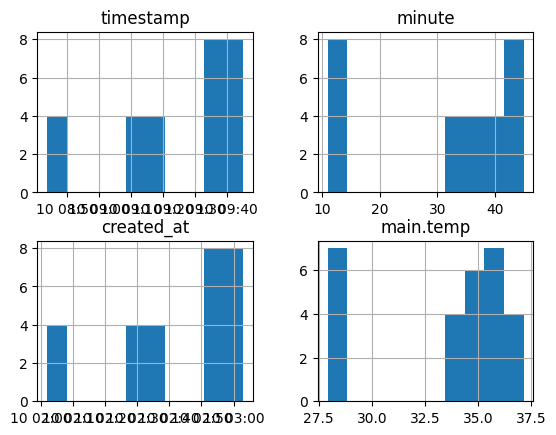

In [2]:
df2.hist()